#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [1]:
# ---- Imports ---- #

import cv2
import numpy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from pathlib import Path
print("Imports completed without errors")

Imports completed without errors


In [2]:
## Reading the image plaksha_Faculty.jpg
image_path : Path = Path("Plaksha_Faculty.jpg")
image = cv2.imread(str(image_path))
  
## Convert the image to grayscale
image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
"""
Esraaj's Note:
    The Haar-cascade model (contained within its .xml file) is a pre-trained OpenCV object
    detector built using the Viola-Jones + cascade method. The XML file stores the learned
    features, thresholds, and cascade stages (whatever this means). This allows OpenCV to
    classify image regions as "face" and "not-a-face".

"""
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(image_bw,
                                           1.05,        # scaleFactor -- How the algorithm searches for different faces. 1.05 means that each step changes scale by 5%, a very fine search
                                           4,           # minNeighbors -- At least 4 neighbouring boxes must agree that this region is a face
                                           minSize=(25,25), maxSize=(50,50)) # Face size
 
# Define the text and font parameters
text = "face" ##he text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 0.6  ## Font scale factor
font_color = (0,0,255)  ## Text color in BGR format (here, it's red)
font_thickness = 2  ## Thickness of the text

image_annot = image.copy()

# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(image_annot, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    position = (x, y - 20)
    """Place the text flightly above the face"""
    cv2.putText(image_annot, text, position, font, font_scale, font_color, font_thickness)
 
    """Pass all the arguments I came up with"""
    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow(f"Total number of face detected are {len(faces_rect)}", image_annot)
"""
Esraaj's Notes:
    Titled cv2 imshow.
    Since the image is black and white, the "red" labels do not express as red labels"""
cv2.waitKey(0)
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/esraaj/jupyterenv/lib/python3.13/site-packages/cv2/qt/plugins"


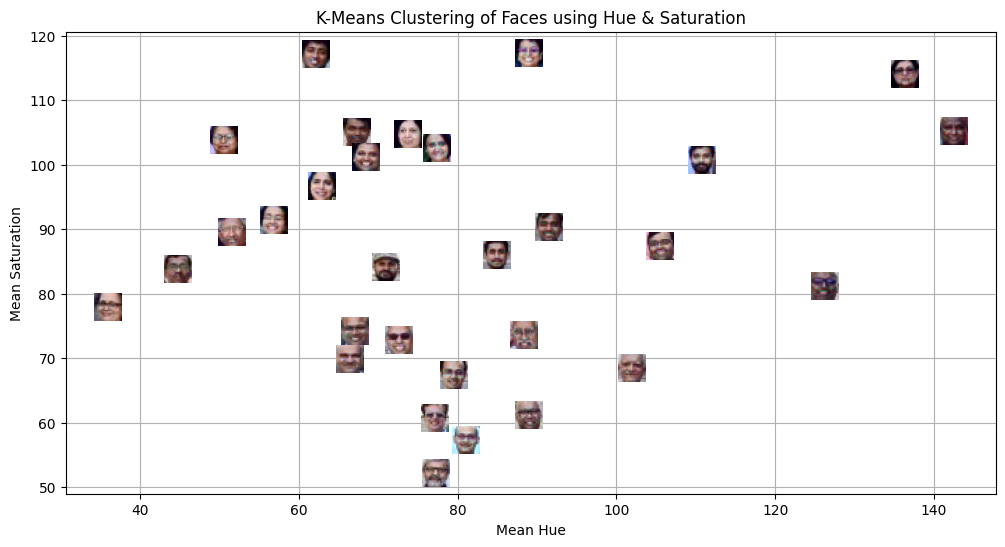

In [28]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np # <-- We need this too.
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
"""
Esraaj's Note:
    HSV requires 3 channels (BGR). We detect the faces on grayscale, map collected face onto
    the colored image and extract HSV features.
"""

"""Init lists"""
hue_saturation : list = list([])
face_images : list = list([])  # To store detected face images

"""Extract features per detected face"""
for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
K_CLUSTERS : int = 2 # <-- We assume 2 to be the number of clusters (because the rest of the code seems to be written for 2 clusters)
kmeans = KMeans(n_clusters=K_CLUSTERS, random_state=0, n_init="auto").fit(hue_saturation)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

## Put x label
plt.xlabel("Mean Hue")

## Put y label
plt.ylabel("Mean Saturation")

## Put title
plt.title("K-Means Clustering of Faces using Hue & Saturation")

## Put grid
plt.grid(True) # <-- I do as I am told

## show the plot
plt.show() # <-- Lo and Behold!

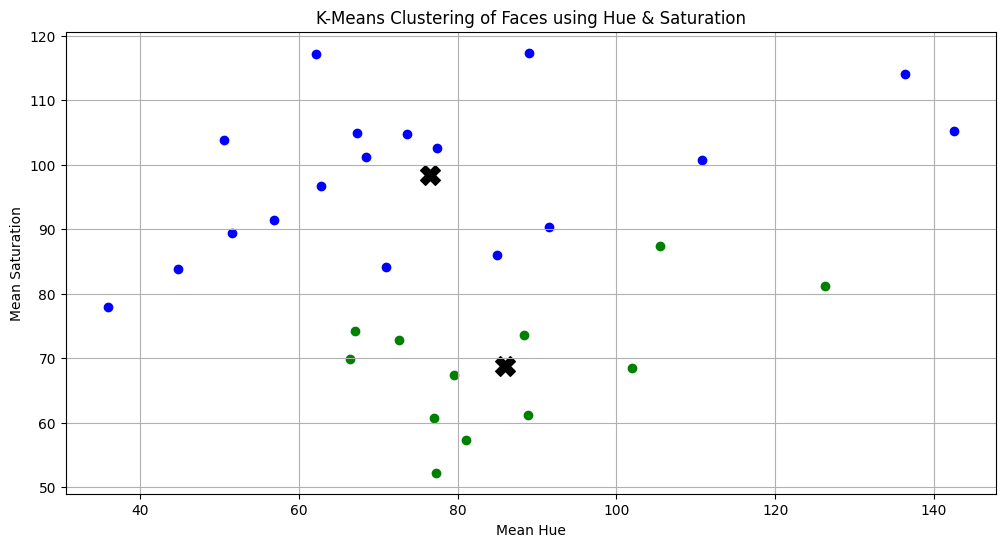

In [29]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label="Cluster 0")
"""Green is such a beautiful colour!"""

cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label="Cluster 1")
"""Blue isn't nearly as pretty as green, but I do as I am told. If you'd  let me, I'd make this purple!"""

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]


# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], marker="X", s=200, c='black', label="Centroid 0")
plt.scatter(centroid_1[0], centroid_1[1], marker="X", s=200, c='black', label="Centroid 1")
"""Black is such a souless colour."""


## Put x label
plt.xlabel("Mean Hue")

## Put y label
plt.ylabel("Mean Saturation")

## Put title
plt.title("K-Means Clustering of Faces using Hue & Saturation")

## Put grid
plt.grid(True)

## show the plot
plt.show() # <-- Lo and Behold!


In [30]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread("Dr_Shashi_Tharoor.jpg")

# Detect face  in the template image after converting it to gray and store it in template_faces
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(template_gray, 1.05, 4) # <-- We do this again, yay!

for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

cv2.imshow(f"Template: faces detected = {len(template_faces)}", template_img)

cv2.waitKey(0)
cv2.destroyAllWindows()      

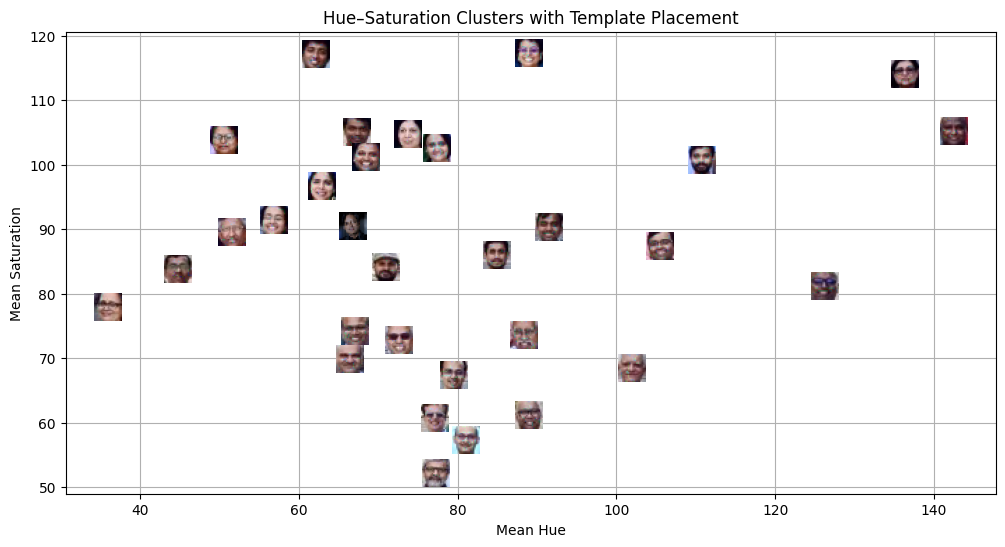

In [31]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
"""HSV :: Hue Saturation Value"""
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])\

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict(np.array([[template_hue, template_saturation]]))[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)


## Put x label
plt.xlabel("Mean Hue")

## Put y label
plt.ylabel("Mean Saturation")

## Put title
plt.title("Hue–Saturation Clusters with Template Placement")
## Put grid
plt.grid(True)

## show the plot
plt.show() # <-- Lo and Behold!

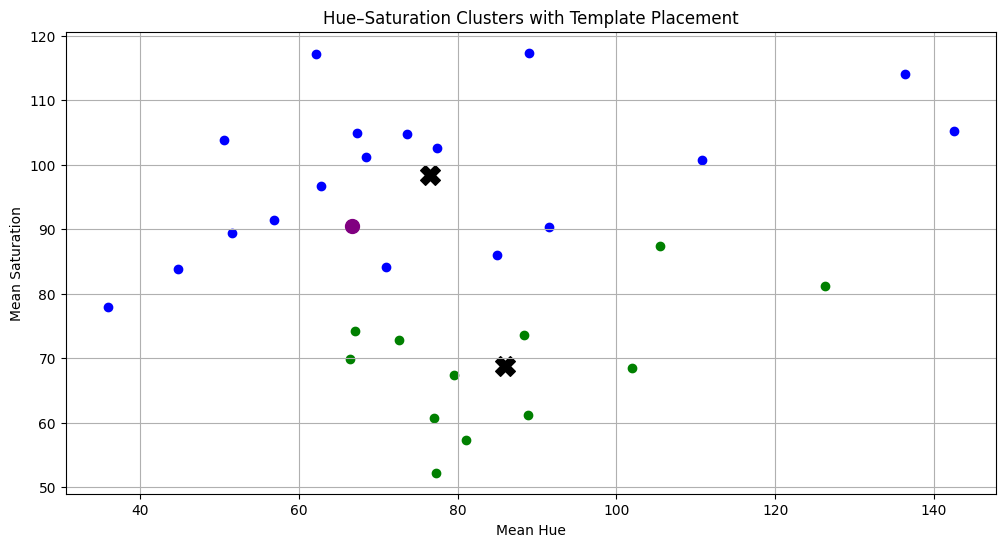

In [32]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c="green", label="Cluster 0")

# Plot points for cluster 1 in blue <-- such an unromantic color, may we please have purple next time? Or magenta?
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c="blue", label="Cluster 1")

# Calculate and plot centroids for both the clusters
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

plt.scatter(centroid_0[0], centroid_0[1], marker="X", s=200, c="black", label="Centroid 0")  # centroid 0
plt.scatter(centroid_1[0], centroid_1[1], marker="X", s=200, c="black", label="Centroid 1")  # centroid 1

plt.plot(template_hue, template_saturation, marker='o', c= 'purple',markersize= 10, label=' Class ?' )

## Put x label
plt.xlabel("Mean Hue")

## Put y label
plt.ylabel("Mean Saturation")

## Put title
plt.title("Hue–Saturation Clusters with Template Placement")
## Put grid
plt.grid(True)

## show the plot
plt.show() # <-- Lo and Behold!
                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 
* Euclidean Distance $\delta = \sqrt{\sum (x_i - y_i)^2}$
* Manhattan Distance $\delta = \sum |x_i - y_i|$
* Minkowski Distance $\delta = \bigg( \sum (x_i - y_i)^p \bigg)^{1/p}$
* Chebyshev Distance $\delta = \text{max} |x_i - y_i|$
* Cosine Distance $\delta = 1 - \frac{x \cdot y }{||x|| \, ||y||}$
* Hamming Distance $\delta = \sum_{x_i \neq y_i} 1$
* Mahalonabis Distance $\delta = \sqrt{(\bar{x} - \bar{y})^T \Sigma^{-1} (\bar{x} - \bar{y})} = \frac{|x - y|}{\sigma}$

#### 2. What are some real-world applications of distance-based classification algorithms? 

Distance based classification algorithms such as KNN have multiple real-world applications such as
* Facial Recognition Systems -- The algorithm may identify a person by measuring the distance between the observed facial features vector to stored embeddings using nearest-neighbors.
* Image Retrival -- Find visually similar images by measuring distances in the feature-space.
* Anomaly Detection -- Classify points as possible outliers when the observed datum lies far away from its nearest neighbours in the feature space.
* Recommendation Systems -- Suggest similar items based on nearest neighbours in the feature space.

#### 3. Explain various distance metrics. 
* Euclidean Distance $\delta = \sqrt{\sum (x_i - y_i)^2}$
is the "straight-line" distance in continuos space. It is best used when features are continuous and scaled. It is sensitive to feature scale and to outliers.
* Manhattan Distance $\delta = \sum |x_i - y_i|$ is the distance along the basis axes. It may be more robust to outliers than the Eucledian Distance (in some cases), and often better is dimensions higher than L2
* Minkowski Distance $\delta = \bigg( \sum (x_i - y_i)^p \bigg)^{1/p}$ generalizes the Manhattan Distance ($p = 1$) and the Euclidean Distance ($p=2$). Changing $p$ allows one to change the sensitivity to large distances in higher dimensions.
* Chebyshev Distance $\delta = \text{max} |x_i - y_i|$ measures the single largest coordinate difference. It is useful when the worst-case deviation must be taken into account.
* Cosine Distance $\delta = 1 - \frac{x \cdot y }{||x|| \, ||y||}$ measures angles, instead of magnitudes (like the other distance metrics on this list). Very useful for embeddings where vector lengths are not significant.
* Hamming Distance $\delta = \sum_{x_i \neq y_i} 1$ measures the number of position deviations. Useful in binary encodings (or other categorical encodings), one-hot vectors, etc. 
* Mahalonabis Distance $\delta = \sqrt{(\bar{x} - \bar{y})^T \Sigma^{-1} (\bar{x} - \bar{y})} = \frac{|x - y|}{\sigma}$ accounts for feature scale and covariance. Useful when features are correlated and eliminates the use of "distance in std deviation units" (since we divide by the standard deviation).

#### 4. What is the role of cross validation in model performance?
Cross-validation is used to estimate and improve the performance of a model's performance instead of evaluating the model on a single train-test split (that may be probabilistically beneficial). This is done by splitting the data into multiple "folds", say $k$; the model is trained on say $k-1$ folds and validated on the remaining split. A different set of folds is used to train the model each time (and thus a diffferent validation fold is used to validate the model). At the end we have $k$ validation scores which are then averaged.

* This measures generlization reliability of the model without adding any new data.
* Helps in hyperparameter tuning. Multiple runs can inform one about the best performing hyperparameter in a model for given data.
* Detects model overfitting (if training accuracy is high but cross-validation accuracy is low).
* Detects model underfittings (if both training accuracy anhd cross-validation accuracy are low).
* From mean accuracy and standard deviation, cross-validation may inform one of the stability and consistency of one's model.

#### 5. Explain variance and bias in terms of KNN?
We know that there exists a Variance-Bias tradeoff. KNN models with smallers $K$ values are subject to bias due to their "simplicity", while models with $K$ values too high tend to overfit -- variance increases due to the sensitivity of the model to its training data.